## <div style="text-align: center; background-color:#ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> <b>🏡   Home Loan Approval Prediction   🏡</b></div>

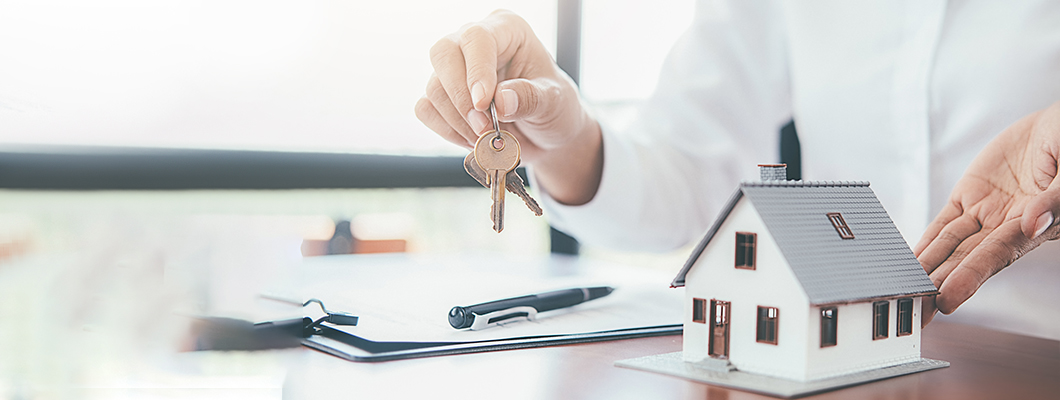

<p style="font-size: 18px;"><b>HomeLoan Overview</b></p>
<p>A home loan, also known as a housing loan or a mortgage, is a type of loan provided by financial institutions, such as banks or housing finance companies, to help individuals or families purchase a house. Home loans are typically long-term loans, ranging from 5 to 30 years, and are secured by the property being purchased.</p>

<p>The loan amount and the interest rate offered by the lender will depend on various factors such as the borrower's income, credit score, employment history, the value of the property, and the down payment made by the borrower. Generally, borrowers are required to make a down payment of 10-20% of the property value and the lender provides the remaining amount as a loan.</p>

<p>When a borrower takes out a home loan, they are required to repay the loan amount along with interest over the loan tenure through monthly installments. Defaulting on home loan payments can lead to penalties and even foreclosure of the property by the lender.</p>

<p>Overall, home loans can help individuals and families achieve their dream of owning a home, but it is important to carefully consider the terms and conditions of the loan and ensure that the monthly repayments are affordable before committing to a loan.</p>



<p style="font-size: 18px;"><b>About Company</b></p>
<p>Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.</p>


<p style="font-size: 18px;"><b>Problem Statement</b></p>
<p>The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.</p>

<a class="anchor" id="toc"></a>
<h1 style = 'text-align: center;font-family : Calibri'> 📙Table of Contents  </h1> 

<div class="list-group" id="list-tab" role="tablist">
   
* [<b>1. 📚Importing Libraries](#1)  
* [<b>2. 📖Reading Datasets from csv files](#2)
* [<b>3. 🗄️Data Preparation</b>](#3)          
* [<b>4. 📊Exploratory Data Analysis</b>](#4)
    - [4.1 👦Analysis - Impact of Gender, Education, Self Employed and Credit History on Loan Status](#4.1)
    - [4.2 🏢Analysis - Impact of Property Area on Loan Approval](#4.2)
    - [4.3 💰Analysis - Impact of Income on Loan Approval](#4.3)
    - [4.4 📅Analysis - Impact of Loan Term on Loan Approval](#4.4)
* [<b>5. 🤖ML Model</b>](#5)
    - [5.1 ⚙️Feature Engineering and Model Building](#5.1)
    - [5.2 ✂️Splitting Data into Train and Test](#5.2)
    - [5.3 🌳Random Forest Classifier Model](#5.3)
    - [5.4 💪Feature Importance](#5.4)
* [<b>6. 📌Conclusion</b>](#6)
* [<b>7. 🏡Thank You🏡</b>](#7)

<a id="1"></a>
# <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> 📚Importing Libraries</div>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import colorama
from colorama import Fore, Back, Style

#ignoring warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

[🔁Table of Contents🔁](#toc)

<a id="2"></a>
# <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> 📖Reading Datasets from csv files</div>

In [12]:
loan_data = pd.read_pickle("loan_data_clean.pkl")

In [13]:
loan_data.head()

Gender  Married  Dependents  Education  Self_Employed  LoanAmount  \
1       1        1           1          1              0       128.0   
2       1        1           0          1              1        66.0   
3       1        1           0          0              0       120.0   
4       1        0           0          1              0       141.0   
5       1        1           2          1              1       267.0   

   Loan_Amount_Term  Credit_History  Loan_Status  Total_Income  \
1               360             1.0            0        6091.0   
2               360             1.0            1        3000.0   
3               360             1.0            1        4941.0   
4               360             1.0            1        6000.0   
5               360             1.0            1        9613.0   

   Property_Area_Semiurban  Property_Area_Urban  
1                        0                    0  
2                        0                    1  
3                        0                    1  
4                        0                    1  
5                        0                    1

In [14]:
loan_data.nunique()

Gender                       2
Married                      2
Dependents                   4
Education                    2
Self_Employed                2
LoanAmount                 186
Loan_Amount_Term             9
Credit_History               2
Loan_Status                  2
Total_Income               437
Property_Area_Semiurban      2
Property_Area_Urban          2
dtype: int64

In [105]:
X = loan_data.drop("LoanAmount", axis=1)
y = loan_data["LoanAmount"]

In [106]:
# Split your data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape

((360, 11), (120, 11))

In [107]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import r2_score, mean_squared_error

In [108]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.3536734161442866

In [109]:
y_pred = LR.predict(X_test)
r2_score(y_test, y_pred)

0.3536734161442866

In [110]:
models = []
models.append(LinearRegression())
models.append(Ridge())
models.append(Lasso())
models.append(ElasticNet())
models.append(DecisionTreeRegressor())
models.append(KNeighborsRegressor())

models # list of models

[LinearRegression(),
 Ridge(),
 Lasso(),
 ElasticNet(),
 DecisionTreeRegressor(),
 KNeighborsRegressor()]

In [111]:
import numpy as np

In [112]:
cv_results = []
n_splits = 5
mean_train_score = []
test_scores = []

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=101)  # >> shuffler & spliiter 

# going to cross-validate all the 5 models
for model in models:
    results = cross_validate(model, X, y, return_train_score=True, cv=kfold, scoring="r2")  # 'accuracy'
    cv_results.append(results)
    test_scores.append(results['test_score'] ) 
    mean_train_score.append(results['train_score'].mean().round(3) )

In [113]:
results_df = pd.DataFrame(test_scores, index=['LR', 'Ridge', 'Lasso', 'EN', 'DT', 'KNN'], \
                  columns='CV1 CV2 CV3 CV4 CV5'.split() )
results_df['CV Mean'] = np.round(results_df.iloc[:,0:n_splits].mean(axis=1), 4)
results_df['CV Std Dev'] = np.round(results_df.iloc[:,0:n_splits].std(axis=1), 4)

results_df['Mean_Train_Score'] = mean_train_score

results_df.sort_values(by='CV Mean', ascending=False)*100

CV1        CV2        CV3        CV4         CV5  CV Mean  \
KNN    43.100451  27.812766  14.699294  44.616936   36.393199    33.32   
Lasso  37.162449  34.247409  31.084930  34.438746   -5.185069    26.35   
EN     34.981160  33.830977  32.868100  35.465162   -7.578258    25.91   
Ridge  37.535694  32.778376  29.708095  33.482308   -9.038042    24.89   
LR     37.528607  32.707540  29.575389  33.392041   -9.193004    24.80   
DT     -2.253312 -33.606977 -55.268817  15.817073 -130.568482   -41.18   

       CV Std Dev  Mean_Train_Score  
KNN         12.35              53.9  
Lasso       17.76              35.9  
EN          18.75              34.0  
Ridge       19.17              36.5  
LR          19.21              36.5  
DT          57.03             100.0

# After Scaling

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pipelines = []

pipelines.append(Pipeline([('Scaler', StandardScaler()), ('Scaled_LR', LinearRegression())]))
pipelines.append(Pipeline([('Scaler', StandardScaler() ), ('Scaled_Ridge', Ridge(random_state=101) ) ] ) )
pipelines.append(Pipeline([('Scaler', StandardScaler() ), ('Scaled_Lasso', Lasso(random_state=101) ) ] ) )
pipelines.append(Pipeline([('Scaler', StandardScaler() ), ('Scaled_EN', ElasticNet(random_state=101) ) ] ) )
pipelines.append(Pipeline([('Scaler', StandardScaler() ), ('Scaled_DT', DecisionTreeRegressor(random_state=101) ) ] ) )
pipelines.append(Pipeline([('Scaler', StandardScaler() ), ('Scaled_KNN', KNeighborsRegressor() ) ] ) )

pipelines # list of pipelined models

[Pipeline(steps=[('Scaler', StandardScaler()),
                 ('Scaled_LR', LinearRegression())]),
 Pipeline(steps=[('Scaler', StandardScaler()),
                 ('Scaled_Ridge', Ridge(random_state=101))]),
 Pipeline(steps=[('Scaler', StandardScaler()),
                 ('Scaled_Lasso', Lasso(random_state=101))]),
 Pipeline(steps=[('Scaler', StandardScaler()),
                 ('Scaled_EN', ElasticNet(random_state=101))]),
 Pipeline(steps=[('Scaler', StandardScaler()),
                 ('Scaled_DT', DecisionTreeRegressor(random_state=101))]),
 Pipeline(steps=[('Scaler', StandardScaler()),
                 ('Scaled_KNN', KNeighborsRegressor())])]

In [115]:
cv_results = []
n_splits = 5
mean_train_score = []
test_scores = []
model_names = []

# going to cross-validate all the 5 models
for pipeline in pipelines:
    results = cross_validate(pipeline, X, y, return_train_score=True, cv=kfold, scoring="r2")
    cv_results.append(results)
    test_scores.append(results['test_score'] ) 
    mean_train_score.append(results['train_score'].mean().round(3) )
    
    model_names.append(pipeline.steps[-1][0])

In [116]:
results_df = pd.DataFrame(test_scores, index=model_names, columns='CV1 CV2 CV3 CV4 CV5'.split() )
results_df['CV Mean'] = np.round(results_df.iloc[:,0:n_splits].mean(axis=1), 4)
results_df['CV Std Dev'] = np.round(results_df.iloc[:,0:n_splits].std(axis=1), 4)

results_df['Mean_Train_Score'] = mean_train_score

results_df.sort_values(by='CV Mean', ascending=False)*100

CV1        CV2        CV3        CV4        CV5  CV Mean  \
Scaled_EN     31.915603  26.233145  21.743390  29.134999  24.711869    26.75   
Scaled_Lasso  36.852171  33.375819  29.424488  33.532540  -3.707133    25.90   
Scaled_Ridge  37.508459  32.671150  29.525842  33.380813  -8.783604    24.86   
Scaled_LR     37.528607  32.707540  29.575389  33.392041  -9.193004    24.80   
Scaled_KNN     8.317077  19.449063  20.955423  29.409792  12.306622    18.09   
Scaled_DT      1.472899 -21.779485 -89.280754  24.106241 -97.424324   -36.58   

              CV Std Dev  Mean_Train_Score  
Scaled_EN           3.93              32.7  
Scaled_Lasso       16.76              36.3  
Scaled_Ridge       19.02              36.5  
Scaled_LR          19.21              36.5  
Scaled_KNN          8.17              49.1  
Scaled_DT          54.38             100.0

In [117]:
EN_pipeline = Pipeline([('Scaler', StandardScaler() ), ('Scaled_EN', ElasticNet(random_state=101)  ) ] )
EN_pipeline

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Scaled_EN', ElasticNet(random_state=101))])

In [118]:
EN_pipeline.steps

[('Scaler', StandardScaler()), ('Scaled_EN', ElasticNet(random_state=101))]

In [119]:
from sklearn.model_selection import GridSearchCV
alpha_values = [0.001, 0.01, 0.1, 1, 10, 50, 100]
l1_ratio = [0.2, 0.4, 0.6, 0.8]
param_grid = {'Scaled_EN__alpha': alpha_values, 'Scaled_EN__l1_ratio': l1_ratio}

grid = GridSearchCV(estimator=EN_pipeline, param_grid=param_grid, scoring='r2', cv=kfold, return_train_score=True)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_,\
                             grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.273059 using {'Scaled_EN__alpha': 1, 'Scaled_EN__l1_ratio': 0.8}
0.248204 (0.171319) with: {'Scaled_EN__alpha': 0.001, 'Scaled_EN__l1_ratio': 0.2}
0.248162 (0.171447) with: {'Scaled_EN__alpha': 0.001, 'Scaled_EN__l1_ratio': 0.4}
0.248119 (0.171575) with: {'Scaled_EN__alpha': 0.001, 'Scaled_EN__l1_ratio': 0.6}
0.248076 (0.171703) with: {'Scaled_EN__alpha': 0.001, 'Scaled_EN__l1_ratio': 0.8}
0.249806 (0.166584) with: {'Scaled_EN__alpha': 0.01, 'Scaled_EN__l1_ratio': 0.2}
0.249400 (0.167829) with: {'Scaled_EN__alpha': 0.01, 'Scaled_EN__l1_ratio': 0.4}
0.248987 (0.169084) with: {'Scaled_EN__alpha': 0.01, 'Scaled_EN__l1_ratio': 0.6}
0.248569 (0.170351) with: {'Scaled_EN__alpha': 0.01, 'Scaled_EN__l1_ratio': 0.8}
0.261986 (0.126431) with: {'Scaled_EN__alpha': 0.1, 'Scaled_EN__l1_ratio': 0.2}
0.259454 (0.135929) with: {'Scaled_EN__alpha': 0.1, 'Scaled_EN__l1_ratio': 0.4}
0.256520 (0.146235) with: {'Scaled_EN__alpha': 0.1, 'Scaled_EN__l1_ratio': 0.6}
0.253134 (0.157430) with: {'Scaled_

In [120]:
final_EN_model = grid_result.best_estimator_

In [121]:
final_EN_model.fit(X, y)  # one last training using the entire data

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Scaled_EN',
                 ElasticNet(alpha=1, l1_ratio=0.8, random_state=101))])

In [122]:
final_EN_model.steps[-1][-1].intercept_

144.73541666666668

In [123]:
final_EN_model.steps[-1][-1].coef_

array([ 0.85353421,  8.24882625,  5.14293564,  6.70853371,  2.35540752,
        3.50578793, -0.        , -3.84009336, 33.7695147 , -0.46925753,
       -5.46932934])

In [124]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Total_Income',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [125]:
coef_df = pd.DataFrame(final_EN_model.steps[-1][-1].coef_, index= list(X.columns), columns=["Coef Values"] )
coef_df.sort_values(by = "Coef Values", ascending=False)

Coef Values
Total_Income               33.769515
Married                     8.248826
Education                   6.708534
Dependents                  5.142936
Loan_Amount_Term            3.505788
Self_Employed               2.355408
Gender                      0.853534
Credit_History             -0.000000
Property_Area_Semiurban    -0.469258
Loan_Status                -3.840093
Property_Area_Urban        -5.469329

In [126]:
final_EN_model.predict(X[-5:])    

array([109.79946403, 141.56797705, 153.18480178, 154.10017623,
       133.52578768])

In [128]:
import pickle
# save the model to hard disk
with open("final_EN_model.pkl", "wb") as f:
    pickle.dump(final_EN_model, f)

In [130]:
del final_EN_model

In [131]:
final_EN_model.predict(X[-5:])  

NameError: name 'final_EN_model' is not defined

In [132]:
import pickle
# save the model to hard disk
with open("final_EN_model.pkl", "rb") as f:
    final_EN_model = pickle.load(f)

In [134]:
final_EN_model.predict(X[-5:])  

array([109.79946403, 141.56797705, 153.18480178, 154.10017623,
       133.52578768])